In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import our data
songs_df = pd.read_csv('SpotifyFeatures.csv')
songs_df.head(10)
songs_df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [3]:
#Check the shape of the data
songs_df.shape

(232725, 18)

<AxesSubplot:>

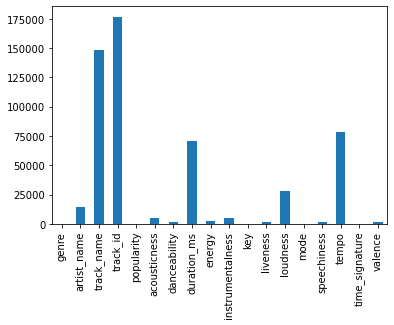

In [4]:
#Visualize unique values in each column
songs_df.nunique().plot(kind='bar')

In [5]:
#Find the number of songs for each genre in the dataset
songs_df['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [6]:
#Remove unconventional or non_musical genres to summarize general musical trends
cols_todrop = ["Children's Music","Comedy","A Capella","Anime","Opera","Movie","Soundtrack","Children's Music"]

songs_df = songs_df[songs_df.genre.isin(cols_todrop) == False]
songs_df['genre'].value_counts()

Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Name: genre, dtype: int64

In [7]:
#Create subsetted dataframe for our genre
genre_df = songs_df[songs_df['genre'] == 'Country']
genre_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
688,Country,Cam,My Mistake,5ICoYTFfmUKguBHpINKkGL,45,0.00821,0.551,200013,0.704,0.000002,G#,0.2450,-5.426,Major,0.0444,97.075,4/4,0.541
689,Country,Kevin Fowler,That Girl,0rk6JE7ODyGWWquK4y7t1u,42,0.02720,0.375,208187,0.859,0.000000,G,0.2670,-3.243,Major,0.0569,74.059,4/4,0.597
690,Country,Roger Miller,Chug-A-Lug,3vMwtAfDNM8dDBWMvS78pn,46,0.69000,0.699,123360,0.408,0.000219,B,0.1450,-11.460,Major,0.0960,171.922,4/4,0.842
691,Country,M. Ward,Chinese Translation,7IJlk42gDKt5dfSSLwtEsp,54,0.15200,0.555,238600,0.726,0.000178,D,0.1480,-8.939,Major,0.0368,107.719,4/4,0.505
692,Country,Chris Cagle,Anywhere But Here,2JxSaSRavL82FCTCPzVmEf,42,0.57100,0.640,243000,0.478,0.000000,B,0.0902,-6.960,Major,0.0330,136.717,4/4,0.315


In [8]:
#Check the shape of the data
songs_df.shape

(182854, 18)

In [9]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182854 entries, 135 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             182854 non-null  object 
 1   artist_name       182854 non-null  object 
 2   track_name        182854 non-null  object 
 3   track_id          182854 non-null  object 
 4   popularity        182854 non-null  int64  
 5   acousticness      182854 non-null  float64
 6   danceability      182854 non-null  float64
 7   duration_ms       182854 non-null  int64  
 8   energy            182854 non-null  float64
 9   instrumentalness  182854 non-null  float64
 10  key               182854 non-null  object 
 11  liveness          182854 non-null  float64
 12  loudness          182854 non-null  float64
 13  mode              182854 non-null  object 
 14  speechiness       182854 non-null  float64
 15  tempo             182854 non-null  float64
 16  time_signature    

In [10]:
songs_df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,182854.000000,182854.000000,182854.000000,1.828540e+05,182854.000000,182854.000000,182854.000000,182854.000000,182854.000000,182854.000000,182854.000000
mean,46.982522,0.284635,0.583872,2.403253e+05,0.611346,0.113561,0.193784,-8.375369,0.092150,119.752646,0.481400
std,14.579690,0.312085,0.170047,1.003761e+05,0.237329,0.263728,0.165578,5.024586,0.095901,30.120668,0.248819
min,0.000000,0.000001,0.056900,1.550900e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,33.593000,0.000000
25%,37.000000,0.025500,0.473000,1.920000e+05,0.461000,0.000000,0.096100,-9.840000,0.036200,95.031000,0.282000
50%,48.000000,0.149000,0.597000,2.241695e+05,0.642000,0.000033,0.125000,-7.074000,0.050600,118.382000,0.476000
75%,57.000000,0.479000,0.710000,2.664000e+05,0.799000,0.013000,0.238000,-5.254000,0.101000,140.021000,0.678000
max,100.000000,0.996000,0.987000,5.488000e+06,0.999000,0.996000,1.000000,3.744000,0.957000,242.903000,0.992000


In [11]:
#Get summary statistics for target variable
songs_df['popularity'].describe()

count    182854.000000
mean         46.982522
std          14.579690
min           0.000000
25%          37.000000
50%          48.000000
75%          57.000000
max         100.000000
Name: popularity, dtype: float64

In [12]:
#Check for null/missing values
songs_df.isnull().any()

genre               False
artist_name         False
track_name          False
track_id            False
popularity          False
acousticness        False
danceability        False
duration_ms         False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
speechiness         False
tempo               False
time_signature      False
valence             False
dtype: bool

In [13]:
#Check Value Counts for categorical variables
songs_df['key'].value_counts()

C     21464
G     20599
C#    18984
D     18218
A     18052
F     15183
B     15023
E     13696
F#    12251
G#    12203
A#    11866
D#     5315
Name: key, dtype: int64

In [14]:
ovr_count = songs_df['time_signature'].count()

In [15]:

fourfour_count =songs_df['time_signature'].value_counts()[0]

In [16]:
fourfour_count/ovr_count

0.9118477036324062

In [17]:
songs_df['mode'].value_counts()

Major    117010
Minor     65844
Name: mode, dtype: int64

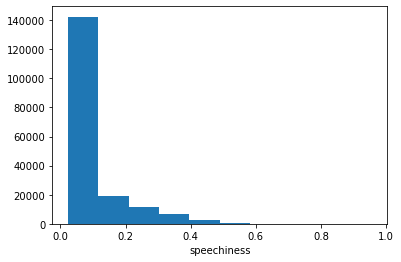

False    160187
True      22667
Name: speechiness, dtype: int64

In [32]:
#Check Distribution of values across columns
plt.hist(songs_df['speechiness'])
plt.xlabel('speechiness')
plt.show()

inst = songs_df['speechiness']>0.2
inst.value_counts()

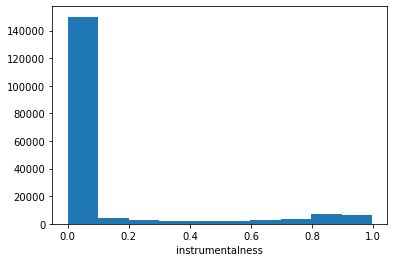

None


False    150066
True      32788
Name: instrumentalness, dtype: int64

In [19]:
plt.hist(songs_df['instrumentalness'])
plt.xlabel('instrumentalness')
print(plt.show())

inst = songs_df['instrumentalness']>0.1
inst.value_counts()


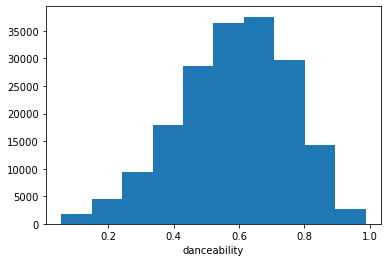

In [20]:
plt.hist(songs_df['danceability'])
plt.xlabel('danceability')
plt.show()

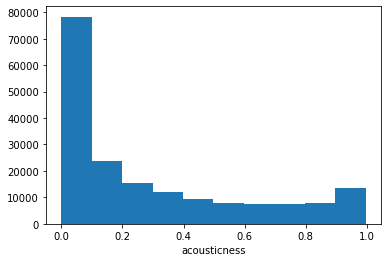

       genre               artist_name  \
135      R&B             Mary J. Blige   
136      R&B                   Rihanna   
137      R&B                 Yung Bleu   
138      R&B                  Surfaces   
139      R&B            Olivia O'Brien   
...      ...                       ...   
232720  Soul                     Slave   
232721  Soul  Jr Thomas & The Volcanos   
232722  Soul              Muddy Waters   
232723  Soul                   R.LUM.R   
232724  Soul            Mint Condition   

                                        track_name                track_id  \
135                     Be Without You - Kendu Mix  2YegxR5As7BeQuVp2U6pek   
136                                      Desperado  6KFaHC9G178beAp7P0Vi5S   
137     Ice On My Baby (feat. Kevin Gates) - Remix  6muW8cSjJ3rusKJ0vH5olw   
138                      Heaven Falls / Fall on Me  7yHqOZfsXYlicyoMt62yC6   
139                                    Love Myself  4XzgjxGKqULifVf7mnDIQK   
...                        

In [21]:
plt.hist(songs_df['acousticness'])
plt.xlabel('acousticness')
plt.show()
print(songs_df)

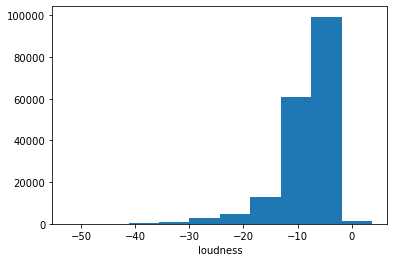

In [22]:
plt.hist(songs_df['loudness'])
plt.xlabel('loudness')
plt.show()

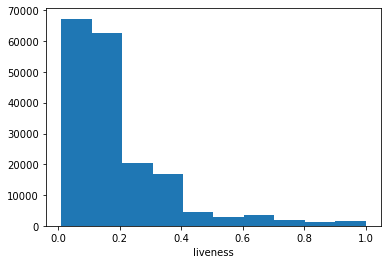

0.1937843204961339


In [23]:
plt.hist(songs_df['liveness'])
plt.xlabel('liveness')
plt.show()
print(songs_df['liveness'].mean())

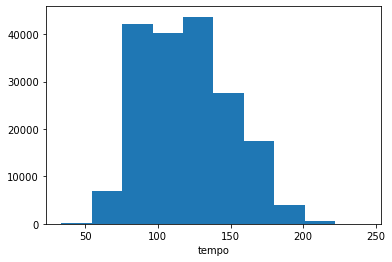

In [24]:
plt.hist(songs_df['tempo'])
plt.xlabel('tempo')
plt.show()

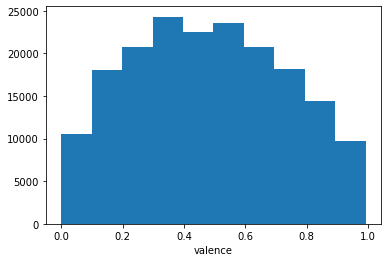

In [25]:
plt.hist(songs_df['valence'])
plt.xlabel('valence')
plt.show()

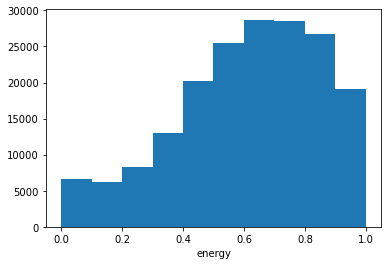

In [26]:
plt.hist(songs_df['energy'])
plt.xlabel('energy')
plt.show()

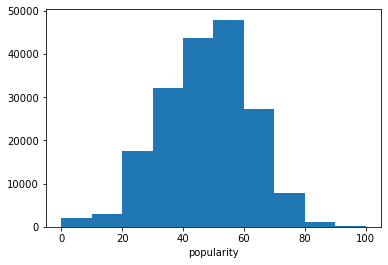

In [27]:
plt.hist(songs_df['popularity'])
plt.xlabel('popularity')
plt.show()

In [28]:
#Check correlation coeffs for each variable to see possible columns to drop
songs_df.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.159617,0.210586,-0.106866,0.101268,-0.254550,-0.074918,0.254779,0.096548,0.016930,-0.013419
acousticness,-0.159617,1.000000,-0.269177,0.083100,-0.734190,0.311496,-0.100818,-0.660787,-0.122554,-0.172450,-0.246051
danceability,0.210586,-0.269177,1.000000,-0.190884,0.190577,-0.251047,-0.079050,0.328748,0.236041,-0.075873,0.444883
duration_ms,-0.106866,0.083100,-0.190884,1.000000,-0.120853,0.203552,0.034222,-0.169988,-0.103106,-0.035295,-0.186277
energy,0.101268,-0.734190,0.190577,-0.120853,1.000000,-0.304754,0.183313,0.795259,0.131840,0.204979,0.392672
instrumentalness,-0.254550,0.311496,-0.251047,0.203552,-0.304754,1.000000,-0.065254,-0.495781,-0.153333,-0.085677,-0.214981
liveness,-0.074918,-0.100818,-0.079050,0.034222,0.183313,-0.065254,1.000000,0.106584,0.090689,0.028503,0.034921
loudness,0.254779,-0.660787,0.328748,-0.169988,0.795259,-0.495781,0.106584,1.000000,0.128396,0.179751,0.305526
speechiness,0.096548,-0.122554,0.236041,-0.103106,0.131840,-0.153333,0.090689,0.128396,1.000000,0.060613,0.081463
tempo,0.016930,-0.172450,-0.075873,-0.035295,0.204979,-0.085677,0.028503,0.179751,0.060613,1.000000,0.068855


<AxesSubplot:>

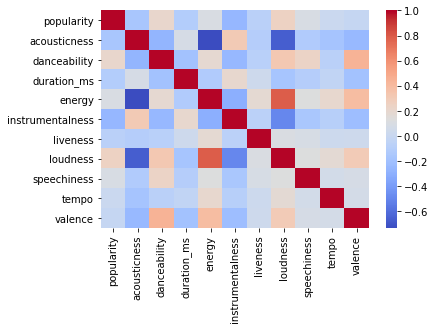

In [29]:
#Plot corr coeffs
sns.heatmap(songs_df.corr(),annot=False, fmt='.2f', cmap = 'coolwarm')

In [30]:
songs_df.dtypes
num_songs_df = songs_df.drop(columns = ['genre','artist_name','track_name','track_id','key','time_signature','mode'])
num_songs_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
135,65,0.0830,0.724,246333,0.689,0.000000,0.3040,-5.922,0.1350,146.496,0.6930
136,63,0.3230,0.685,186467,0.610,0.000000,0.1020,-5.221,0.0439,94.384,0.3230
137,62,0.0675,0.762,199520,0.520,0.000004,0.1140,-5.237,0.0959,75.047,0.0862
138,61,0.3600,0.563,240597,0.366,0.002430,0.0955,-6.896,0.1210,85.352,0.7680
139,68,0.5960,0.653,213947,0.621,0.000000,0.0811,-5.721,0.0409,100.006,0.4660


In [31]:
#Check for outliers
Q1 = num_songs_df.quantile(0.25)
Q3 = num_songs_df.quantile(0.75)
IQR = Q3-Q1
((num_songs_df < (Q1 - 1.5 * IQR)) | (num_songs_df > (Q3 + 1.5 * IQR))).sum()


popularity           2116
acousticness            0
danceability          996
duration_ms         11487
energy                  0
instrumentalness    39670
liveness            13107
loudness            11525
speechiness         22995
tempo                 152
valence                 0
dtype: int64